In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


In [ ]:
import numpy as np
import os
from PIL import Image


def load(dir, files, reshaped):
    "Load .npy or .npz files from disk and return them as numpy arrays. \
    Takes in a list of filenames and returns a list of numpy arrays."

    data = []
    for file in files:
        f = np.load(dir + file)
        if reshaped:
            new_f = []
            for i in range(len(f)):
                x = np.reshape(f[i], (28, 28))
                x = np.expand_dims(x, axis=0)
                x = np.reshape(f[i], (28, 28, 1))
                new_f.append(x)
            f = new_f
        data.append(f)
    return data


def normalize(data):
    "Takes a list or a list of lists and returns its normalized form"

    return np.interp(data, [0, 255], [-1, 1])


def denormalize(data):
    "Takes a list or a list of lists and returns its denormalized form"

    return np.interp(data, [-1, 1], [0, 255])


def visualize(array):
    "Visulaze a 2D array as an Image"

    img = Image.fromarray(array)
    img.show(title="Visulizing array")


def set_limit(arrays, n):
    "Limit elements from each array up to n elements and return a single list"
    new = []
    for array in arrays:
        i = 0
        for item in array:
            if i == n:
                break
            new.append(item)
            i += 1
    return new


def make_labels(N1, N2):
    "make labels from 0 to N1, each repeated N2 times"
    labels = []
    for i in range(N1):
        labels += [i] * N2
    return labels

In [ ]:
# Keras
from keras.preprocessing.text import Tokenizer
# from tensorflow.keras.utils.sequence import pad_sequences
from keras.utils import pad_sequences

from keras.models import Sequential
from keras.layers import Activation, Dense, Dropout, Embedding, Flatten, Conv1D, MaxPooling1D, LSTM
from keras import utils
from keras.callbacks import ReduceLROnPlateau, EarlyStopping
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

Type 'train' to start training: train
Training commenced
Epoch 1/6
50/50 [==============================] - 4s 51ms/step - loss: 0.5221 - accuracy: 0.7444
Epoch 2/6
50/50 [==============================] - 2s 31ms/step - loss: 0.3062 - accuracy: 0.8731
Epoch 3/6
50/50 [==============================] - 2s 31ms/step - loss: 0.2078 - accuracy: 0.9175
Epoch 4/6
50/50 [==============================] - 2s 31ms/step - loss: 0.1794 - accuracy: 0.9312
Epoch 5/6
50/50 [==============================] - 2s 31ms/step - loss: 0.1551 - accuracy: 0.9406
Epoch 6/6
50/50 [==============================] - 2s 31ms/step - loss: 0.1178 - accuracy: 0.9550
Training complete
Evaluating model
13/13 [==============================] - 0s 9ms/step
Accuracy:  93.0
>Enter name to save trained model: model
Model saved
Testing mode
1/1 [==============================] - 0s 34ms/step
Actual: Airplane
Predicted: Airplane


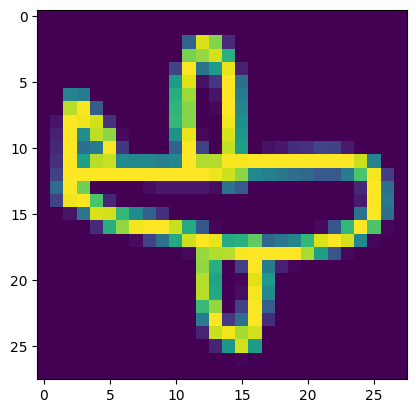

In [ ]:
# from prepare_data import *
from sklearn.model_selection import train_test_split as tts
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from random import randint

# define some constants
N_FRUITS = 2
FRUITS = {0:"Airplane",1:"Helicopter"}

# number of samples to take in each class
N = 1000

# some other constants
N_EPOCHS = 20

# data files in the same order as defined in FRUITS
files = ["airplane.npy","helicopter.npy"]

# images need to be 28x28 for training with a ConvNet
fruits = load("/content/gdrive/MyDrive/Colab Notebooks/dataset_models/", files, reshaped=True)

# images need to be flattened for training with an MLP
# fruits = load("data/", files, reshaped=False)


# limit no of samples in each class to N
fruits = set_limit(fruits, N)

# normalize the values
fruits=list(map(normalize, fruits))
# define the labels
labels = make_labels(N_FRUITS, N)

# prepare the data
x_train, x_test, y_train, y_test = tts(fruits, labels, test_size=0.2)

# one hot encoding
Y_train = to_categorical(y_train, N_FRUITS)
Y_test = to_categorical(y_test, N_FRUITS)

# use our custom designed ConvNet model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, kernel_size=(3, 3), activation='relu'),  # New convolutional layer
    MaxPooling2D(pool_size=(2, 2)),

    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(N_FRUITS, activation='softmax')
])



model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

input("Type 'train' to start training: ")
print("Training commenced")

history =model.fit(np.array(x_train), np.array(Y_train), batch_size=32, epochs=6, verbose=1)

print("Training complete")

print("Evaluating model")
preds = model.predict(np.array(x_test))

score = 0
for i in range(len(preds)):
    if np.argmax(preds[i]) == y_test[i]:
        score += 1

print("Accuracy: ", ((score + 0.0) / len(preds)) * 100)

name = input(">Enter name to save trained model: ")
model.save(name + ".h5")
print("Model saved")


def visualize_and_predict():
    "selects a random test case and shows the object, the prediction and the expected result"
    n = randint(0, len(x_test))
    plt.imshow(x_test[n])
    # visualize(denormalize(np.reshape(x_test[n], (28, 28))))
    pred = FRUITS[np.argmax(model.predict(np.array([x_test[n]])))]
    actual = FRUITS[y_test[n]]
    print("Actual:", actual)
    print("Predicted:", pred)


print("Testing mode")
visualize_and_predict()

In [ ]:
len(x_test)

400

In [ ]:
# pred = FRUITS[np.argmax(model.predict(np.array([x_test[n]])))]
li = []
for i in range(400):

  y_pred_main = np.argmax(model.predict(np.array([x_test[i]])))
  li.append(y_pred_main)

1/1 [==============================] - 0s 22ms/step


In [ ]:
type(li)

list

In [ ]:
type(y_test)

list

## Model workflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.0/993.0 kB 14.2 MB/s eta 0:00:00


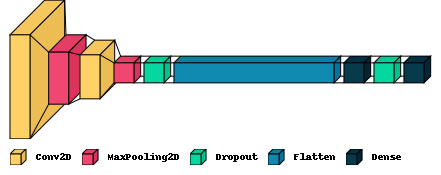

In [ ]:
!pip install visualkeras
import visualkeras
visualkeras.layered_view(model,legend=True, draw_volume=True)


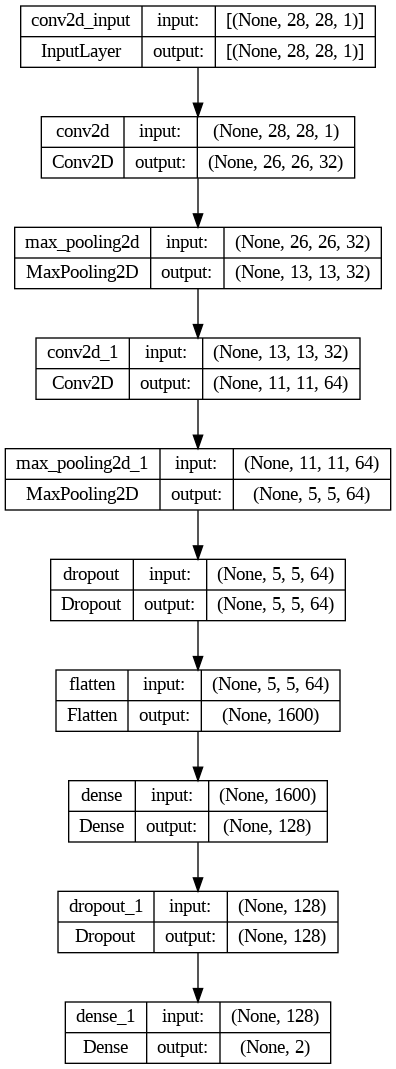

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 5, 5, 64)          0         
                                                                 
 flatten (Flatten)           (None, 1600)              0

## dataset


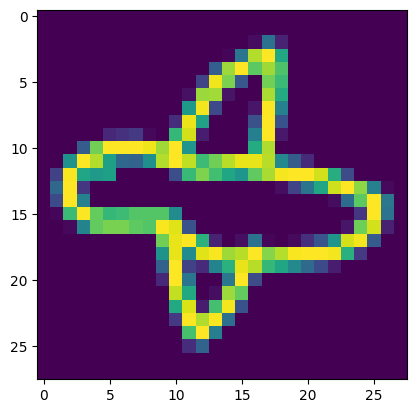

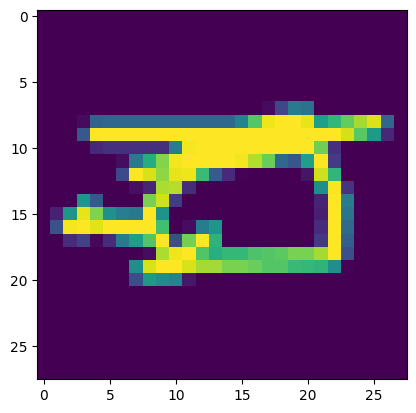

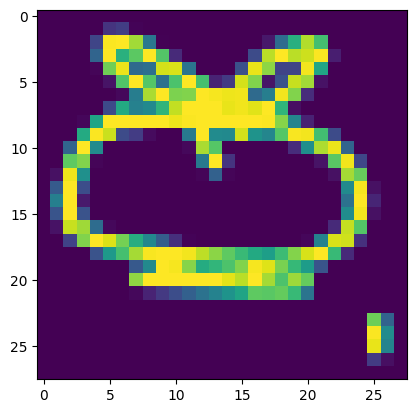

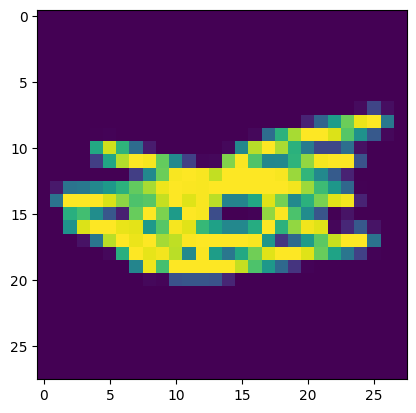

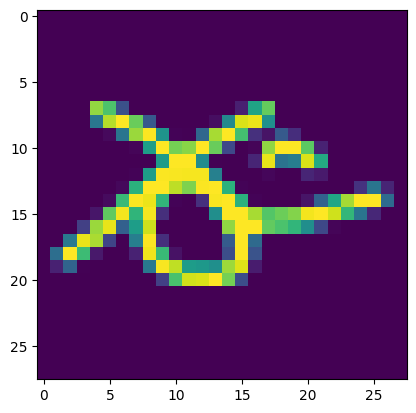

In [ ]:
for i in range(5):
    n = randint(0, len(x_train))
    ss = labels[n]
    # print(ss)
    plt.imshow(x_train[n])
    plt.show()

## Loss Plot

In [ ]:
def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

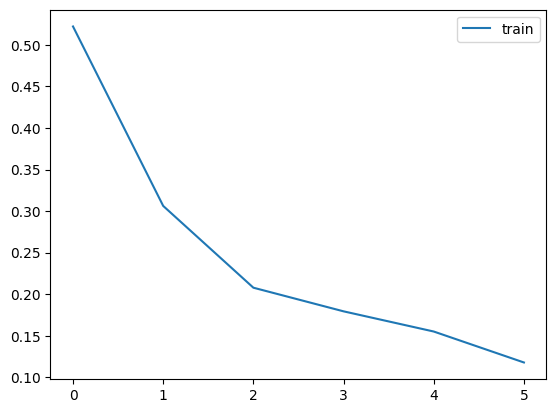

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["loss"],label="train")
plt.legend()
plt.show()

## Train Plot

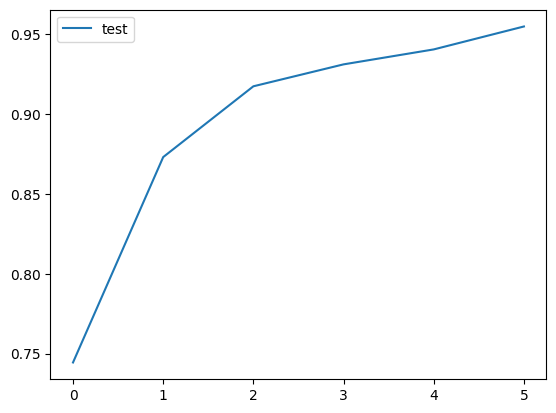

In [ ]:
import matplotlib.pyplot as plt
#plt.plot(history.history["accuracy"],label="train")
plt.plot(history.history["accuracy"],label="test")
plt.legend()
plt.show()

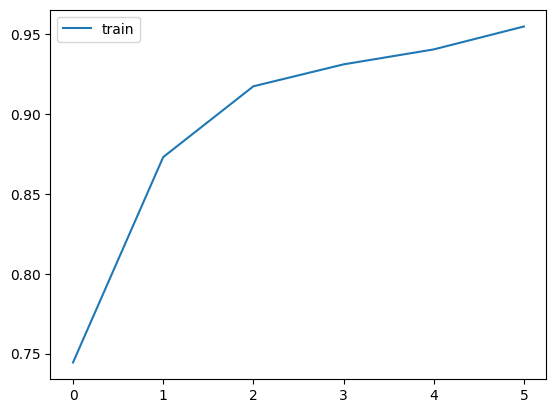

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history["accuracy"],label="train")
#plt.plot(history.history["accuracy"],label="test")
plt.legend()
plt.show()

## Testing

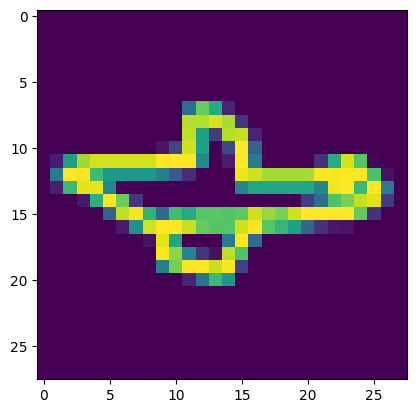

1/1 [==============================] - 0s 22ms/step
Actual: Airplane
Predicted: Airplane


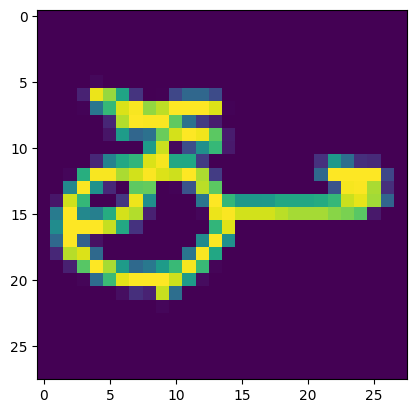

1/1 [==============================] - 0s 33ms/step
Actual: Helicopter
Predicted: Helicopter


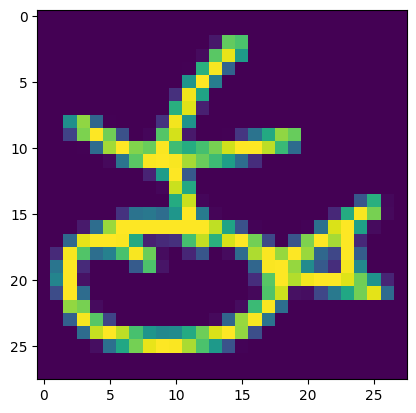

1/1 [==============================] - 0s 30ms/step
Actual: Helicopter
Predicted: Helicopter


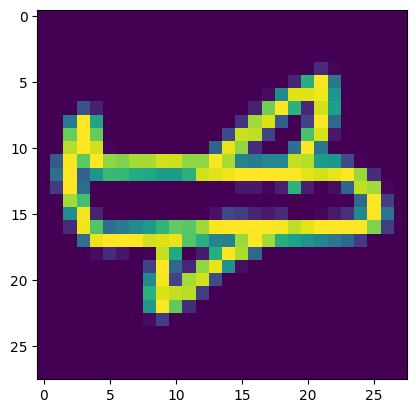

1/1 [==============================] - 0s 43ms/step
Actual: Airplane
Predicted: Airplane


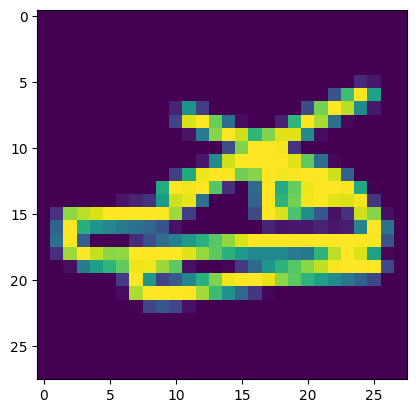

1/1 [==============================] - 0s 30ms/step
Actual: Helicopter
Predicted: Helicopter


In [ ]:
def visualize_and_predict():
    "selects a random test case and shows the object, the prediction and the expected result"
    n = randint(0, len(x_test))
    plt.imshow(x_test[n])
    plt.show()
    pred = FRUITS[np.argmax(model.predict(np.array([x_test[n]])))]
    actual = FRUITS[y_test[n]]
    print("Actual:", actual)
    print("Predicted:", pred)


for i in range(5):
    visualize_and_predict()

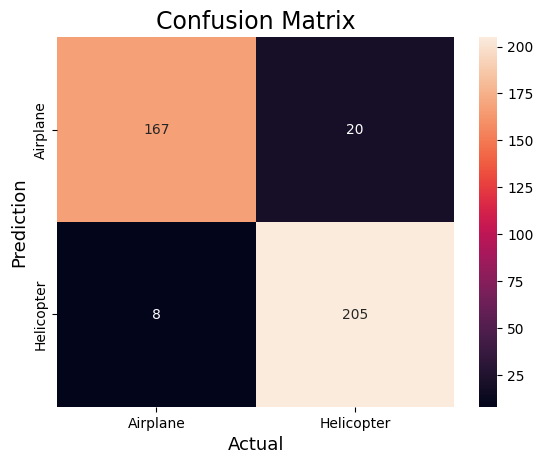

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, li)
# Visualize confusion matrix as a heatmap
sns.heatmap(cm,
            annot=True,
            fmt='g',
            xticklabels=['Airplane','Helicopter'],
            yticklabels=['Airplane','Helicopter'])
plt.ylabel('Prediction',fontsize=13)
plt.xlabel('Actual',fontsize=13)
plt.title('Confusion Matrix',fontsize=17)
plt.show()